# Lecture 8

This lecture will use the Titanic data set to give you familiarity on the first three steps of the data science process
1. Data Collection
1. Data Cleaning
1. Data Exploration

### References:

The Titanic data set from [Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)(click on 'Titanic data' box)

[Titanic Dataset Description (from Kaggle competition)](https://www.kaggle.com/c/titanic/data)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

np.random.seed(0)

In [10]:
# increase Jupyter cell width

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data Collection

The Titanic data set from [Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)(click on 'Titanic data' box) is stored as CSV and consists of the following data columns:

    PassengerId: Id of every passenger.
    Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
    Pclass: There are 3 classes: Class 1, Class 2 and Class 3.
    
        A proxy for socio-economic status (SES)
        1st = Upper
        2nd = Middle
        3rd = Lower    
        
    Name: Name of passenger.
    Sex: Gender of passenger.
    Age: Age of passenger in years.
    SibSp: # of siblings / spouses aboard the Titanic.
    
        The dataset defines family relations in this way...
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)    
        
    Parch: # of parents / children aboard the Titanic.
    
        The dataset defines family relations in this way...
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.    
        
    Ticket: Ticket number of passenger.
    Fare: Indicating the fare.
    Cabin: The cabin of passenger.
    Embarked: The embarked category.  C = Cherbourg, Q = Queenstown,S = Southampton


In [11]:
# get titanic data from pandas repository
!curl https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv --output titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0   177k      0 --:--:-- --:--:-- --:--:--  177k


In [12]:
df = pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [13]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# Data Cleaning

In [14]:
# show columns loaded
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# how many rows of data
df.shape

(891, 12)

## Explore field values

In [16]:
# show summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Identify fields that need data cleaning

Which fields have `NA`, `nan` ?

In [17]:
fields = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [18]:
# explore unique values of each field
df[fields].apply(lambda c: c.unique(), axis=0)

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

In [19]:
# another way to see which fields have NA's or nan's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Fields with  `NA`'s or `nan`'s

In [20]:
nan_fields = ['Embarked', 'Cabin', 'Age']

## Repair Cabin field

In [21]:
df['Cabin'].values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## Data Cleaning: convert Cabin level to numeric value

Create a new field called `Deck` by:
- take first letter from `Cabin` and map A-G to values 1-7
- nan's are assigned U and map to 8

In [22]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

In [23]:
pattern = re.compile("([a-zA-Z]+)")

df['Cabin'] = df['Cabin'].fillna("U0") # replace nan's with unknown cabin "U0"
df['Deck'] = df['Cabin'].map(lambda x: pattern.match(x).group())
df['Deck'] = df['Deck'].map(deck)
df['Deck'] = df['Deck'].fillna(8)
df['Deck'] = df['Deck'].astype('int')


In [24]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3


In [25]:
# Deck field now replaces
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Deck         891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 69.7+ KB


## Data Cleaning: Fix `nan` in `Age` field

- substitute missing values with a random age between `(mean-standard deviation)` and `(mean+standard deviation)`

In [26]:
df['Age'].values

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [28]:
mean = df["Age"].mean()
std = df["Age"].std()
number_of_nan = df["Age"].isnull().sum()
print(mean, std, number_of_nan)

29.69911764705882 14.526497332334042 177


In [29]:
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = number_of_nan)  # create array of 177 random ages

# Create temporary column and fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age # assign random age to rows that have nan

df["Age_fixed"] = age_slice
df["Age_fixed"] = df["Age_fixed"].astype(int)

In [30]:
# show fields with nan, NA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Deck         891 non-null    int32  
 13  Age_fixed    891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 73.2+ KB


## Data Cleaning: Fix `nan` in `Embarked` field

Embarked field represents city of departure. 

Since there are very few `nan`'s for `Embarked` field, replace the most common departure city: 'S'

In [31]:
df['Embarked'].values

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', nan, 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [32]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [33]:
best_guess_departure_city = 'S'
df['Embarked_fixed'] = df['Embarked'].fillna(best_guess_departure_city)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           891 non-null    object 
 11  Embarked        889 non-null    object 
 12  Deck            891 non-null    int32  
 13  Age_fixed       891 non-null    int32  
 14  Embarked_fixed  891 non-null    object 
dtypes: float64(2), int32(2), int64(5), object(6)
memory usage: 76.6+ KB


In [35]:
df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Deck                int32
Age_fixed           int32
Embarked_fixed     object
dtype: object

# Data Exploration

Use data visualization to discover which features are most useful to predict if someone survived on the Titanic

Use `pairplot()` from `seaborn` library to visualize relationship between feature pairs

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Age_fixed',
       'Embarked_fixed'],
      dtype='object')

## Which columns do you think will have predictive power?

'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Age_fixed',
'Embarked_fixed'

In [44]:
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

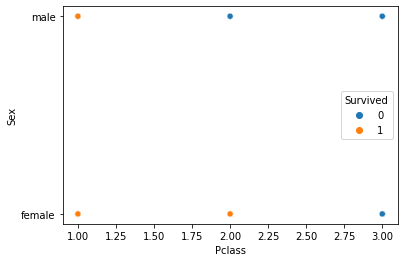

In [45]:
_fields = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Fare', 'Deck', 'Age_fixed','Embarked_fixed']
plot_df = df[_fields]

sns.scatterplot(x='Pclass', y='Sex', hue='Survived', data=plot_df)

<AxesSubplot:xlabel='Age_fixed', ylabel='Fare'>

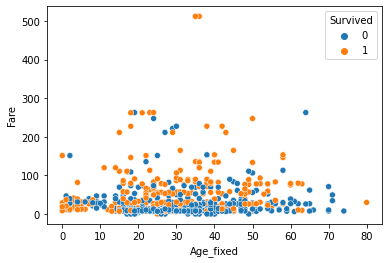

In [46]:
sns.scatterplot(x='Age_fixed', y='Fare', hue='Survived', data=plot_df)

### another way to plot all variable combinations together

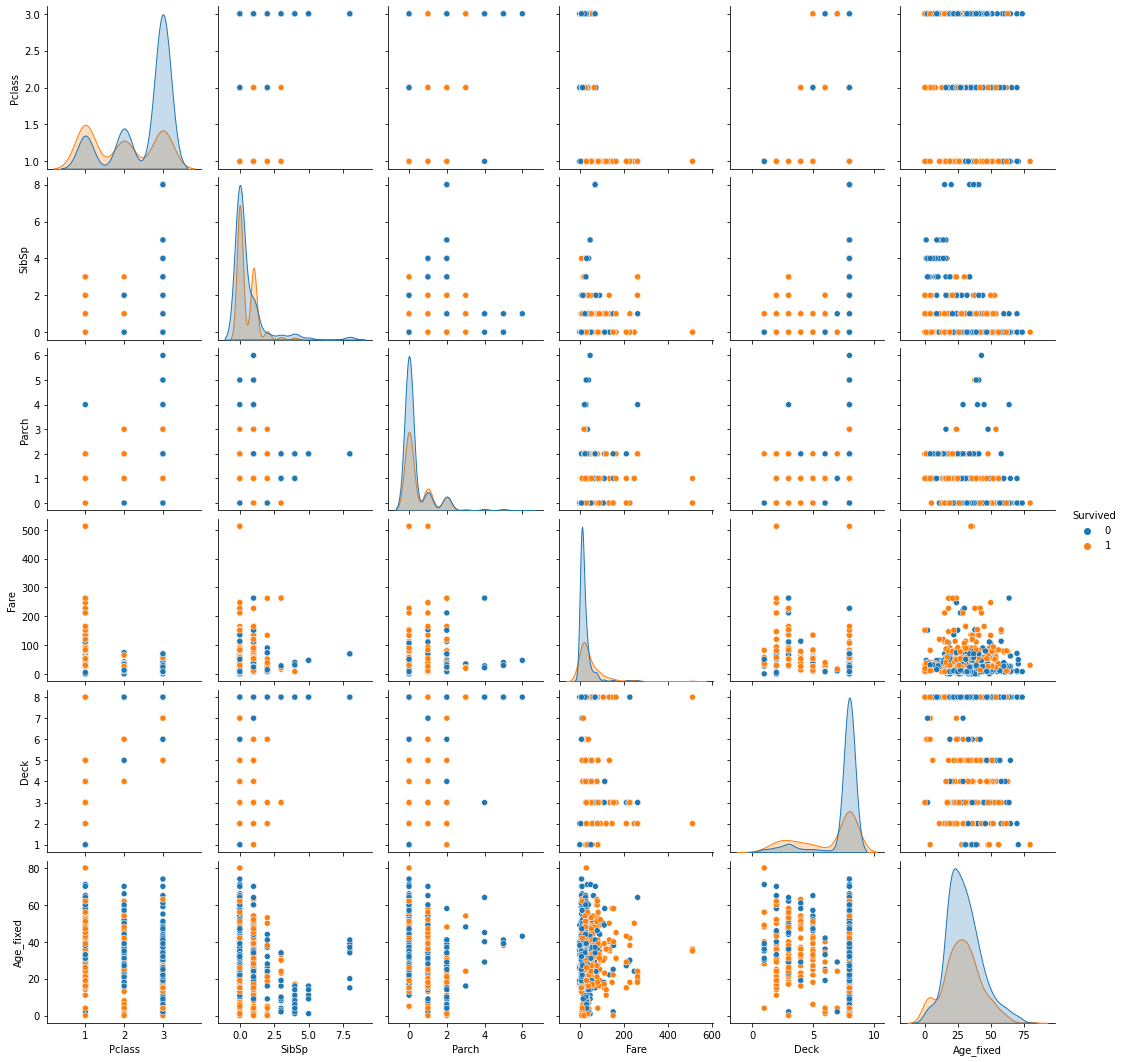

In [47]:
_fields = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Fare', 'Deck', 'Age_fixed','Embarked_fixed']
plot_df = df[_fields]

sns.pairplot(plot_df, hue='Survived')

# Create features to predict if Titanic passenger survived

- features used with machine learning models, must be numerical

1. Map M/F gender to 0/1
1. Map Embark_fixed S/C/Q to 0/1/2

In [48]:
genders = {"male": 0, "female": 1}
embarked = {'S':0, 'C':1, 'Q':2}

df['Sex_numerical'] = df['Sex'].map(genders) # convert Sex to 0/1 with genders dictionary
df['Embarked_numerical'] = df['Embarked_fixed'].map(embarked) # convert Embarked_fixed to 0/1/2 with embarked dictionary

In [49]:
feature_fields = ['Age_fixed', 'Embarked_numerical']
target_field = 'Survived'

In [50]:
df_features = df[feature_fields]
df_target = df[target_field]

In [51]:
df_features.head(2)

,Age_fixed,Embarked_numerical
0,22,0
1,38,1


In [52]:
df[target_field].head(2)

0    0
1    1
Name: Survived, dtype: int64

## Logistic regression to classify Survive/not-Survive

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(df_features, df_target)

## How accurate is the model?

In [57]:
print("This model is able to correctly predict {0:3.3f}% of the training data".format(clf.score(df_features, df_target)*100))

This model is able to correctly predict 60.606% of the training data


# Modify the features field above to the quality of the model

- Experiment with adding different fields to see if you can increase the model's accuracy on the training dataset

- update feature fields above and re-run the model
    ```
    feature_fields = ['Age_fixed', 'Embarked_numerical',  ... ]
    ```